## Importing Libraries

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Importing Data Set

In [3]:
mob_train = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
mob_test = pd.read_csv("/kaggle/input/mobile-price-classification/test.csv")

In [4]:
train_mapper = {"four_g": "is4G","three_g":"is3G", "mobile_wt": "mobile_weight",
          "n_cores": "no_of_cores", "sc_h": "screen_height",
          "sc_w":"screen_width","int_memory":"internal_memory", "pc": "primary_cam_MP",
          "fc": "front_cam_MP", "blue":"has_bluetooth", "m_dep":"mobile_depth"}
mob_train.rename(columns = train_mapper,inplace=True)

test_mapper = {"four_g": "is4G","three_g":"is3G", "mobile_wt": "mobile_weight",
          "n_cores": "no_of_cores", "sc_h": "screen_height",
          "sc_w":"screen_width","int_memory":"internal_memory", "pc": "primary_cam_MP",
          "fc": "front_cam_MP", "blue":"has_bluetooth", "m_dep":"mobile_depth"}
mob_test.rename(columns = test_mapper,inplace=True)

## Pre-Processing

In [5]:
mob_train.isnull().sum()

battery_power      0
has_bluetooth      0
clock_speed        0
dual_sim           0
front_cam_MP       0
is4G               0
internal_memory    0
mobile_depth       0
mobile_weight      0
no_of_cores        0
primary_cam_MP     0
px_height          0
px_width           0
ram                0
screen_height      0
screen_width       0
talk_time          0
is3G               0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [6]:
mob_test.isnull().sum()

id                 0
battery_power      0
has_bluetooth      0
clock_speed        0
dual_sim           0
front_cam_MP       0
is4G               0
internal_memory    0
mobile_depth       0
mobile_weight      0
no_of_cores        0
primary_cam_MP     0
px_height          0
px_width           0
ram                0
screen_height      0
screen_width       0
talk_time          0
is3G               0
touch_screen       0
wifi               0
dtype: int64

In [7]:
mob_train.isna().sum()

battery_power      0
has_bluetooth      0
clock_speed        0
dual_sim           0
front_cam_MP       0
is4G               0
internal_memory    0
mobile_depth       0
mobile_weight      0
no_of_cores        0
primary_cam_MP     0
px_height          0
px_width           0
ram                0
screen_height      0
screen_width       0
talk_time          0
is3G               0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [8]:
mob_test.isna().sum()

id                 0
battery_power      0
has_bluetooth      0
clock_speed        0
dual_sim           0
front_cam_MP       0
is4G               0
internal_memory    0
mobile_depth       0
mobile_weight      0
no_of_cores        0
primary_cam_MP     0
px_height          0
px_width           0
ram                0
screen_height      0
screen_width       0
talk_time          0
is3G               0
touch_screen       0
wifi               0
dtype: int64

In [9]:
mob_train.duplicated().sum()

0

In [10]:
mob_test.duplicated().sum()

0

In [11]:
mob_train.head(2)

battery_power  has_bluetooth  clock_speed  dual_sim  front_cam_MP  is4G  \
0            842              0          2.2         0             1     0   
1           1021              1          0.5         1             0     1   

   internal_memory  mobile_depth  mobile_weight  no_of_cores  ...  px_height  \
0                7           0.6            188            2  ...         20   
1               53           0.7            136            3  ...        905   

   px_width   ram  screen_height  screen_width  talk_time  is3G  touch_screen  \
0       756  2549              9             7         19     0             0   
1      1988  2631             17             3          7     1             1   

   wifi  price_range  
0     1            1  
1     0            2  

[2 rows x 21 columns]

In [12]:
mob_test.head(2)

id  battery_power  has_bluetooth  clock_speed  dual_sim  front_cam_MP  \
0   1           1043              1          1.8         1            14   
1   2            841              1          0.5         1             4   

   is4G  internal_memory  mobile_depth  mobile_weight  ...  primary_cam_MP  \
0     0                5           0.1            193  ...              16   
1     1               61           0.8            191  ...              12   

   px_height  px_width   ram  screen_height  screen_width  talk_time  is3G  \
0        226      1412  3476             12             7          2     0   
1        746       857  3895              6             0          7     1   

   touch_screen  wifi  
0             1     0  
1             0     0  

[2 rows x 21 columns]

In [13]:
mob_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   battery_power    2000 non-null   int64  
 1   has_bluetooth    2000 non-null   int64  
 2   clock_speed      2000 non-null   float64
 3   dual_sim         2000 non-null   int64  
 4   front_cam_MP     2000 non-null   int64  
 5   is4G             2000 non-null   int64  
 6   internal_memory  2000 non-null   int64  
 7   mobile_depth     2000 non-null   float64
 8   mobile_weight    2000 non-null   int64  
 9   no_of_cores      2000 non-null   int64  
 10  primary_cam_MP   2000 non-null   int64  
 11  px_height        2000 non-null   int64  
 12  px_width         2000 non-null   int64  
 13  ram              2000 non-null   int64  
 14  screen_height    2000 non-null   int64  
 15  screen_width     2000 non-null   int64  
 16  talk_time        2000 non-null   int64  
 17  is3G          

In [14]:
mob_train.describe()

battery_power  has_bluetooth  clock_speed     dual_sim  front_cam_MP  \
count    2000.000000      2000.0000  2000.000000  2000.000000   2000.000000   
mean     1238.518500         0.4950     1.522250     0.509500      4.309500   
std       439.418206         0.5001     0.816004     0.500035      4.341444   
min       501.000000         0.0000     0.500000     0.000000      0.000000   
25%       851.750000         0.0000     0.700000     0.000000      1.000000   
50%      1226.000000         0.0000     1.500000     1.000000      3.000000   
75%      1615.250000         1.0000     2.200000     1.000000      7.000000   
max      1998.000000         1.0000     3.000000     1.000000     19.000000   

              is4G  internal_memory  mobile_depth  mobile_weight  no_of_cores  \
count  2000.000000      2000.000000   2000.000000    2000.000000  2000.000000   
mean      0.521500        32.046500      0.501750     140.249000     4.520500   
std       0.499662        18.145715      0.288416      35.399655     2.287837   
min       0.000000         2.000000      0.100000      80.000000     1.000000   
25%       0.000000        16.000000      0.200000     109.000000     3.000000   
50%       1.000000        32.000000      0.500000     141.000000     4.000000   
75%       1.000000        48.000000      0.800000     170.000000     7.000000   
max       1.000000        64.000000      1.000000     200.000000     8.000000   

       ...    px_height     px_width          ram  screen_height  \
count  ...  2000.000000  2000.000000  2000.000000    2000.000000   
mean   ...   645.108000  1251.515500  2124.213000      12.306500   
std    ...   443.780811   432.199447  1084.732044       4.213245   
min    ...     0.000000   500.000000   256.000000       5.000000   
25%    ...   282.750000   874.750000  1207.500000       9.000000   
50%    ...   564.000000  1247.000000  2146.500000      12.000000   
75%    ...   947.250000  1633.000000  3064.500000      16.000000   
max    ...  1960.000000  1998.000000  3998.000000      19.000000   

       screen_width    talk_time         is3G  touch_screen         wifi  \
count   2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean       5.767000    11.011000     0.761500      0.503000     0.507000   
std        4.356398     5.463955     0.426273      0.500116     0.500076   
min        0.000000     2.000000     0.000000      0.000000     0.000000   
25%        2.000000     6.000000     1.000000      0.000000     0.000000   
50%        5.000000    11.000000     1.000000      1.000000     1.000000   
75%        9.000000    16.000000     1.000000      1.000000     1.000000   
max       18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000  

[8 rows x 21 columns]

## Find Correlation for price range

In [15]:
mob_train.corr()["price_range"]

battery_power      0.200723
has_bluetooth      0.020573
clock_speed       -0.006606
dual_sim           0.017444
front_cam_MP       0.021998
is4G               0.014772
internal_memory    0.044435
mobile_depth       0.000853
mobile_weight     -0.030302
no_of_cores        0.004399
primary_cam_MP     0.033599
px_height          0.148858
px_width           0.165818
ram                0.917046
screen_height      0.022986
screen_width       0.038711
talk_time          0.021859
is3G               0.023611
touch_screen      -0.030411
wifi               0.018785
price_range        1.000000
Name: price_range, dtype: float64

In [16]:
mob_train.drop(columns = ["mobile_weight","clock_speed","touch_screen", "mobile_depth"], inplace = True)
mob_test.drop(columns = ["id","mobile_weight","clock_speed","touch_screen","mobile_depth"], inplace = True)

In [17]:
mob_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   battery_power    2000 non-null   int64
 1   has_bluetooth    2000 non-null   int64
 2   dual_sim         2000 non-null   int64
 3   front_cam_MP     2000 non-null   int64
 4   is4G             2000 non-null   int64
 5   internal_memory  2000 non-null   int64
 6   no_of_cores      2000 non-null   int64
 7   primary_cam_MP   2000 non-null   int64
 8   px_height        2000 non-null   int64
 9   px_width         2000 non-null   int64
 10  ram              2000 non-null   int64
 11  screen_height    2000 non-null   int64
 12  screen_width     2000 non-null   int64
 13  talk_time        2000 non-null   int64
 14  is3G             2000 non-null   int64
 15  wifi             2000 non-null   int64
 16  price_range      2000 non-null   int64
dtypes: int64(17)
memory usage: 265.8 KB


## EDA

<Axes: xlabel='ram', ylabel='px_width'>

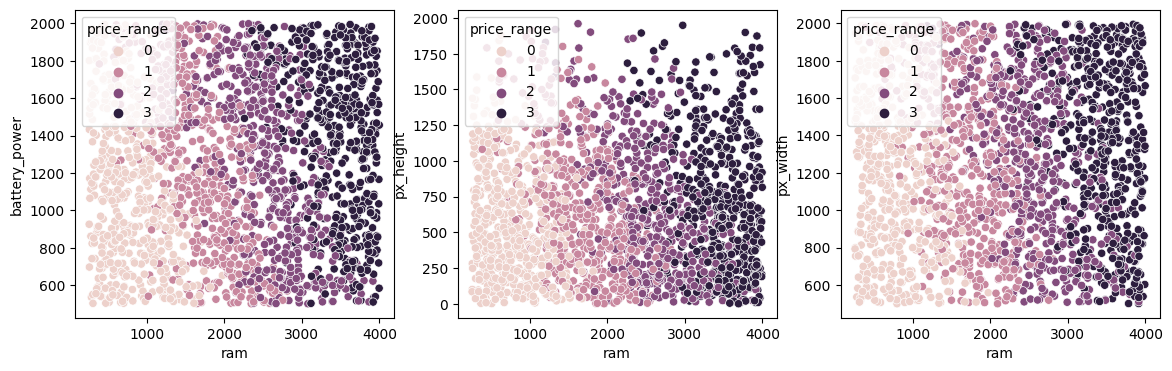

In [18]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.scatterplot(x = "ram" , y ="battery_power",data = mob_train,hue= mob_train["price_range"])

plt.subplot(1,3,2)
sns.scatterplot(x = "ram" , y ="px_height",data = mob_train,hue= mob_train["price_range"])

plt.subplot(1,3,3)
sns.scatterplot(x = "ram" , y ="px_width",data = mob_train,hue= mob_train["price_range"])


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'RAM QQ Plot')

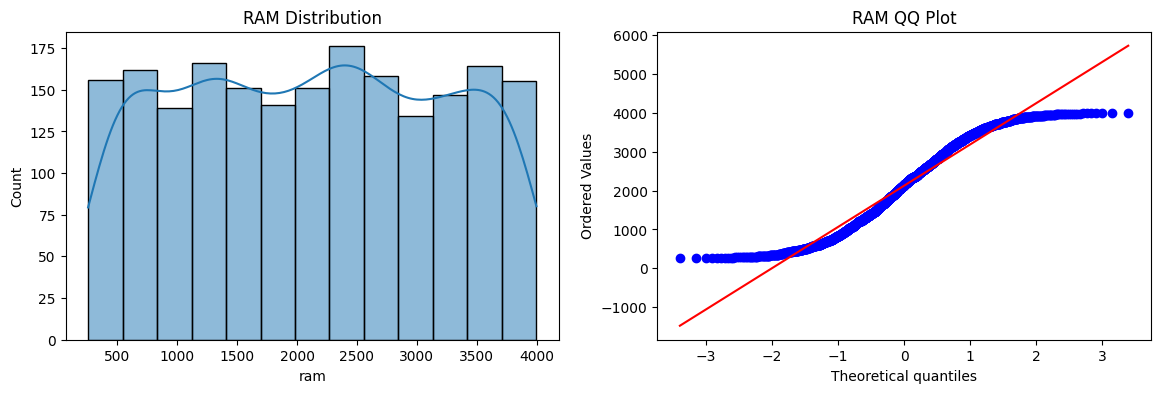

In [19]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(mob_train["ram"],kde = True)
plt.title("RAM Distribution")

plt.subplot(122)
stats.probplot(mob_train["ram"],dist="norm",plot = plt)
plt.title("RAM QQ Plot")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Battery Power QQ Plot')

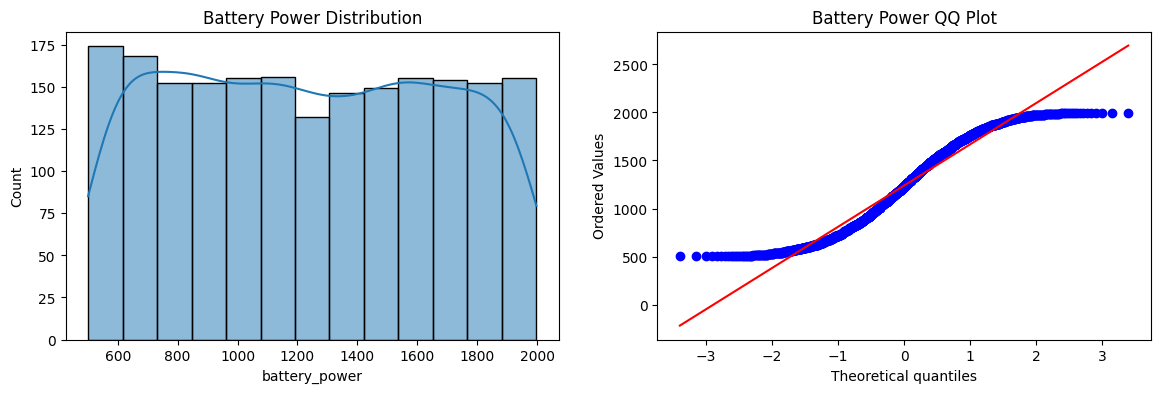

In [20]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(mob_train["battery_power"],kde = True)
plt.title("Battery Power Distribution")

plt.subplot(122)
stats.probplot(mob_train["battery_power"],dist="norm",plot = plt)
plt.title("Battery Power QQ Plot")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Pixel Height QQ Plot')

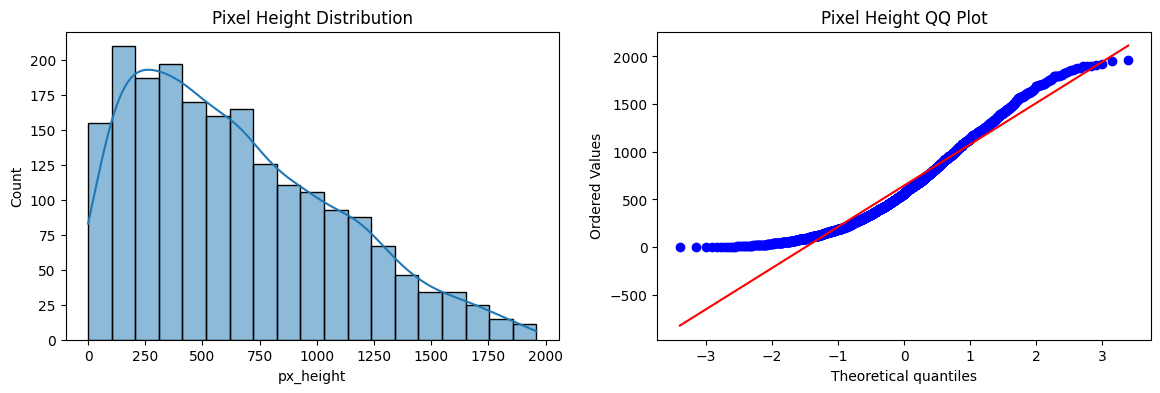

In [21]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(mob_train["px_height"],kde = True)
plt.title("Pixel Height Distribution")

plt.subplot(122)
stats.probplot(mob_train["px_height"],dist="norm",plot = plt)
plt.title("Pixel Height QQ Plot")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Pixel Width QQ Plot')

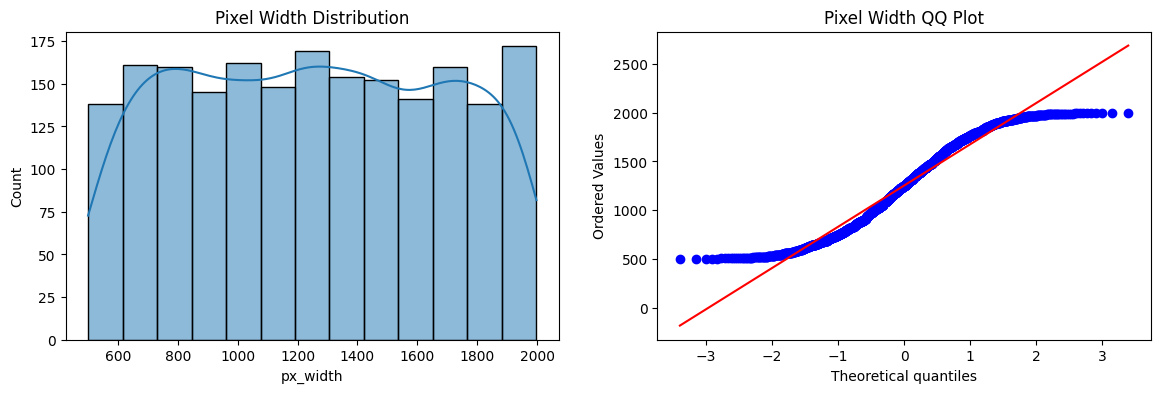

In [22]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(mob_train["px_width"],kde = True)
plt.title("Pixel Width Distribution")

plt.subplot(122)
stats.probplot(mob_train["px_width"],dist="norm",plot = plt)
plt.title("Pixel Width QQ Plot")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Screen Width QQ Plot')

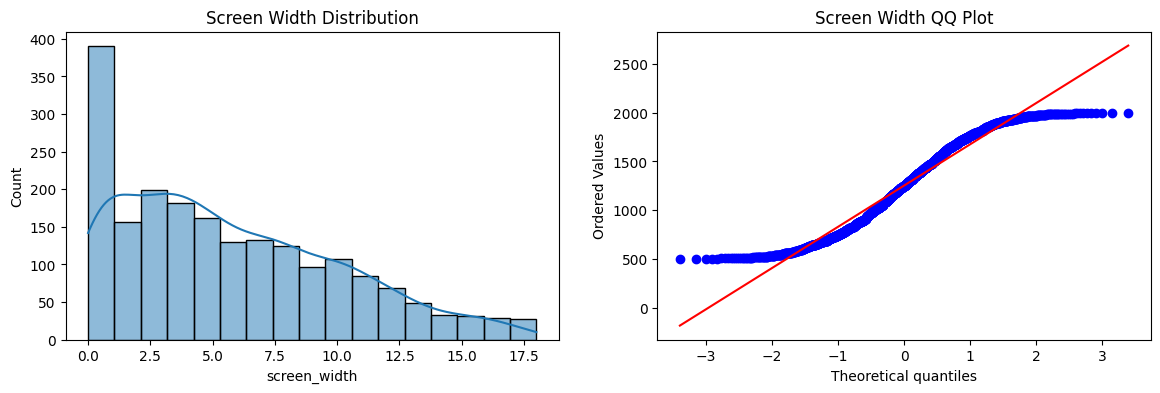

In [23]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(mob_train["screen_width"],kde = True)
plt.title("Screen Width Distribution")

plt.subplot(122)
stats.probplot(mob_train["px_width"],dist="norm",plot = plt)
plt.title("Screen Width QQ Plot")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Screen Height QQ Plot')

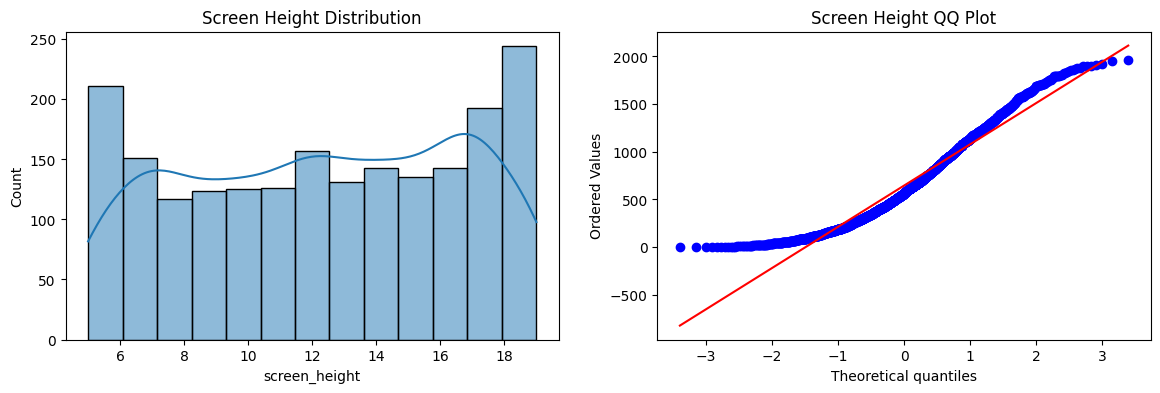

In [24]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(mob_train["screen_height"],kde = True)
plt.title("Screen Height Distribution")

plt.subplot(122)
stats.probplot(mob_train["px_height"],dist="norm",plot = plt)
plt.title("Screen Height QQ Plot")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

<Figure size 800x800 with 0 Axes>

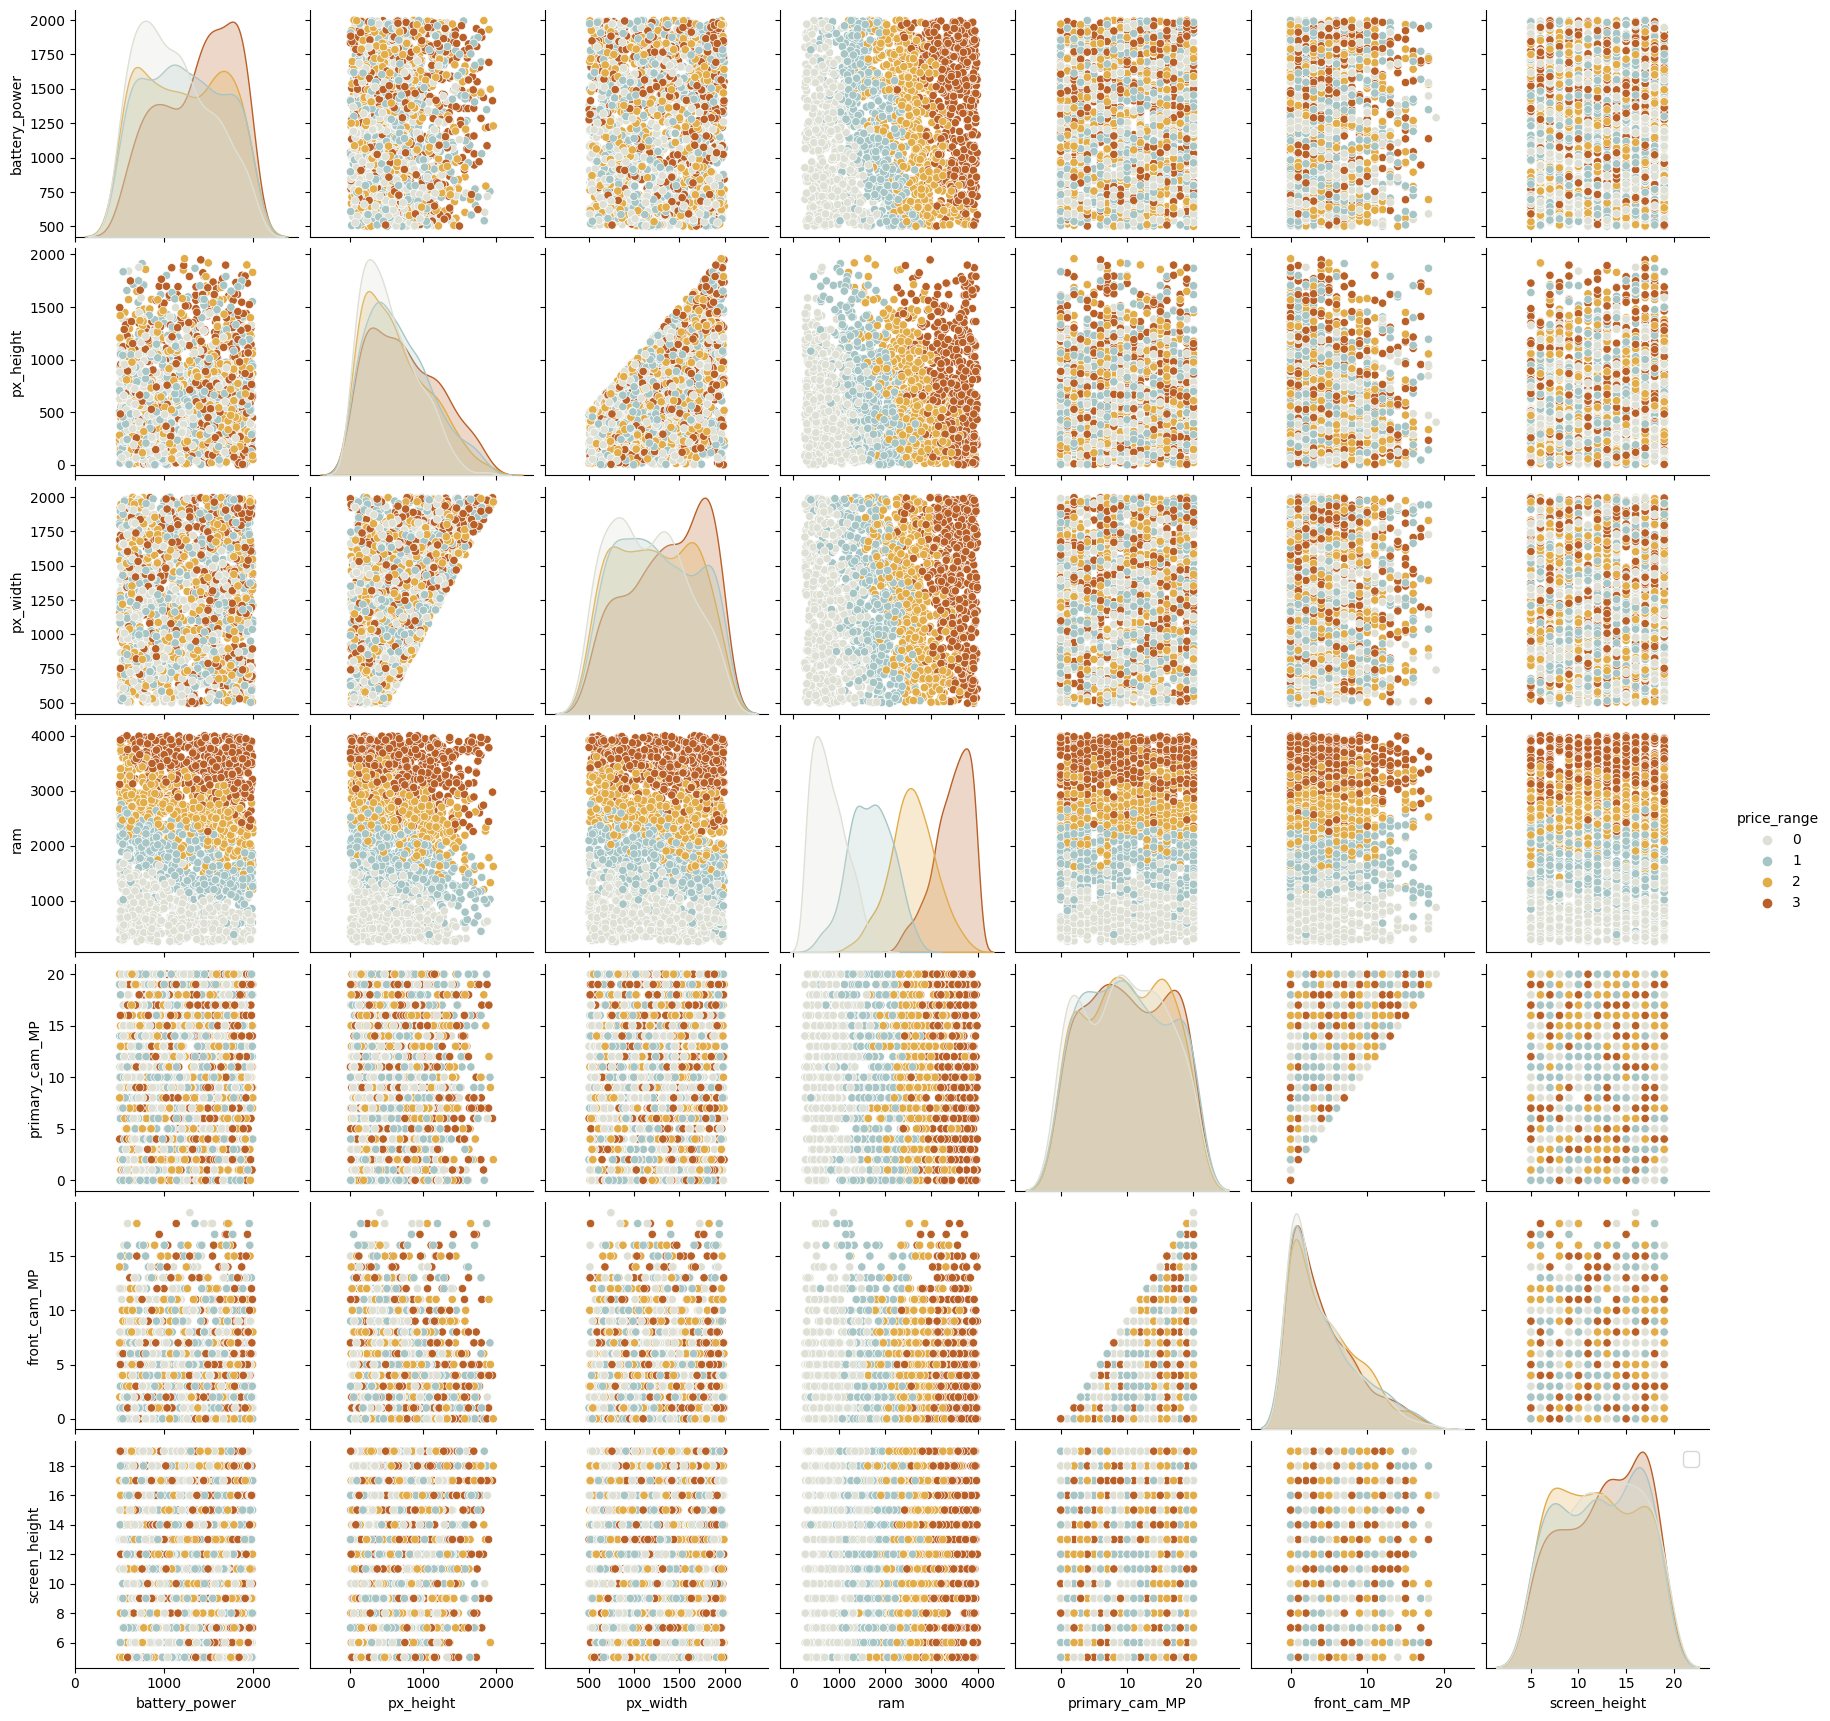

In [25]:
# Pair plot
plt.figure(figsize = (8,8))
sns.pairplot(mob_train[["battery_power","px_height","px_width","ram","primary_cam_MP","front_cam_MP","screen_height","price_range"]]
             ,hue = "price_range",palette = ['#DEE0D5' ,'#A7C5C5' ,  '#E2AC48', '#B96028'])

plt.legend(fontsize = 'x-large')
plt.show()

## Extracting Input and output columns

In [26]:
mob_train.corr()["price_range"]

battery_power      0.200723
has_bluetooth      0.020573
dual_sim           0.017444
front_cam_MP       0.021998
is4G               0.014772
internal_memory    0.044435
no_of_cores        0.004399
primary_cam_MP     0.033599
px_height          0.148858
px_width           0.165818
ram                0.917046
screen_height      0.022986
screen_width       0.038711
talk_time          0.021859
is3G               0.023611
wifi               0.018785
price_range        1.000000
Name: price_range, dtype: float64

In [27]:
X = mob_train[["battery_power","px_height","px_width","ram","primary_cam_MP","front_cam_MP","screen_height"]]
Y = mob_train.iloc[:,-1]

In [28]:
X

battery_power  px_height  px_width   ram  primary_cam_MP  front_cam_MP  \
0               842         20       756  2549               2             1   
1              1021        905      1988  2631               6             0   
2               563       1263      1716  2603               6             2   
3               615       1216      1786  2769               9             0   
4              1821       1208      1212  1411              14            13   
...             ...        ...       ...   ...             ...           ...   
1995            794       1222      1890   668              14             0   
1996           1965        915      1965  2032               3             0   
1997           1911        868      1632  3057               3             1   
1998           1512        336       670   869               5             4   
1999            510        483       754  3919              16             5   

      screen_height  
0                 9  
1                17  
2                11  
3                16  
4                 8  
...             ...  
1995             13  
1996             11  
1997              9  
1998             18  
1999             19  

[2000 rows x 7 columns]

In [29]:
Y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

## Train Test Split

In [30]:
X_train, X_test, y_train,y_test = train_test_split(X,
                                                   Y,
                                                  test_size = 0.2,
                                                  random_state = 0)

X_train.shape, X_test.shape

((1600, 7), (400, 7))

## Standard Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fitting the scaler to train set to learn params
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-1.60788581e-03, -6.60982006e-01, -1.04215865e+00, ...,
         1.18375170e+00, -7.48113697e-01,  8.82404362e-01],
       [ 1.37407489e+00, -7.73314153e-01,  6.55004776e-01, ...,
         1.01894116e+00,  1.81003689e+00, -1.03261358e+00],
       [ 1.03920474e+00,  2.79435481e+00,  1.48283313e+00, ...,
         1.18375170e+00, -5.04362644e-02, -7.93236339e-01],
       ...,
       [-9.66386040e-02,  1.67103335e+00,  8.87903562e-01, ...,
        -1.45321693e+00, -9.80672841e-01,  1.64272633e-01],
       [-9.43759679e-02, -1.06987102e+00,  1.27299363e+00, ...,
        -4.64353694e-01, -5.15554553e-01,  4.03649876e-01],
       [-1.19175450e+00, -2.52092994e-01, -7.44693868e-01, ...,
         1.51337278e+00,  2.04259603e+00, -1.03261358e+00]])

In [32]:
X_test_scaled

array([[ 0.50069734, -0.91035937, -0.52563065, ..., -1.12359585,
        -0.7481137 , -1.27199083],
       [-0.31837695, -0.42059121, -1.59096965, ...,  0.68932008,
         1.3449186 ,  0.40364988],
       [ 0.65908187, -1.12603709, -1.63939415, ..., -1.45321693,
        -0.98067284,  0.88240436],
       ...,
       [-1.44516975, -0.55763643, -1.69012458, ..., -1.28840639,
        -0.7481137 ,  1.12178161],
       [ 0.99621466, -0.99123852, -1.34192937, ..., -0.62916423,
        -0.51555455, -0.07510461],
       [ 0.12962501, -0.12403435, -0.35038008, ..., -0.95878531,
        -0.98067284, -0.79323634]])

In [33]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

X_train_scaled

battery_power  px_height  px_width       ram  primary_cam_MP  \
0         -0.001608  -0.660982 -1.042159 -0.786095        1.183752   
1          1.374075  -0.773314  0.655005 -0.952286        1.018941   
2          1.039205   2.794355  1.482833  1.555428        1.183752   
3         -1.639756  -1.384401 -1.623253 -1.337588       -0.299543   
4         -0.578580   1.902438  1.385984  1.495079        0.854131   
...             ...        ...       ...       ...             ...   
1595      -0.019709  -0.299272 -1.609417  1.571211        1.348562   
1596      -0.169043  -0.773314  1.233793 -0.521490        1.678183   
1597      -0.096639   1.671033  0.887904  1.398522       -1.453217   
1598      -0.094376  -1.069871  1.272994 -0.998708       -0.464354   
1599      -1.191754  -0.252093 -0.744694  0.292751        1.513373   

      front_cam_MP  screen_height  
0        -0.748114       0.882404  
1         1.810037      -1.032614  
2        -0.050436      -0.793236  
3         0.647241       0.164273  
4        -0.515555       1.600536  
...            ...            ...  
1595      1.112359      -0.553859  
1596     -0.748114       1.121782  
1597     -0.980673       0.164273  
1598     -0.515555       0.403650  
1599      2.042596      -1.032614  

[1600 rows x 7 columns]

## Logistic Regression - SoftMax Regression

Cross-validation scores: [0.95625  0.95625  0.940625 0.965625 0.9625  ]
Multionmoial Logistic Regression Accuracy score =  0.9625


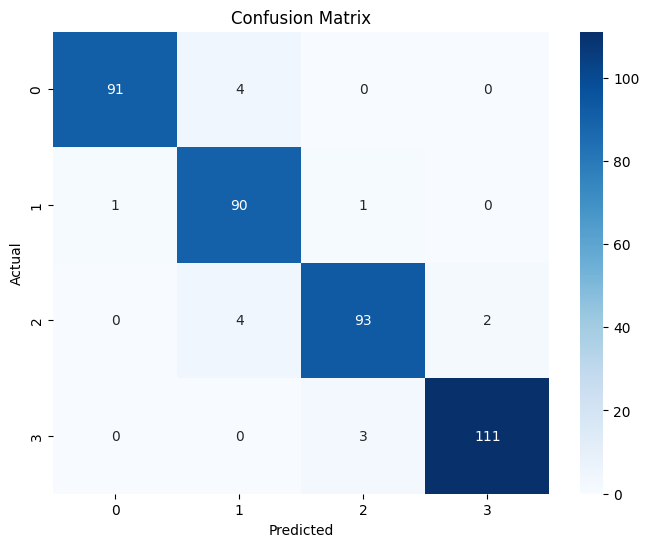

In [34]:
clf = LogisticRegression(multi_class = 'multinomial',solver='lbfgs', max_iter=500)
clf.fit(X_train_scaled,y_train)

cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)

y_pred =clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred) 
print("Multionmoial Logistic Regression Accuracy score = ", accuracy_score(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree Classifier

Cross-validation scores: [0.846875 0.853125 0.8375   0.834375 0.8375  ]
Accuracy Score =  0.8525


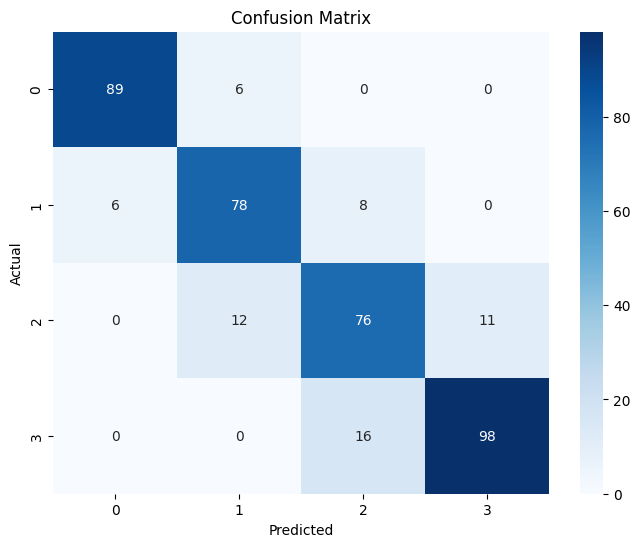

In [35]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

cv_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)

y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
print("Accuracy Score = ",accuracy_score(y_test,y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Classifier

Cross-validation scores: [0.878125 0.878125 0.88125  0.8875   0.89375 ]
Accuracy Score =  0.895


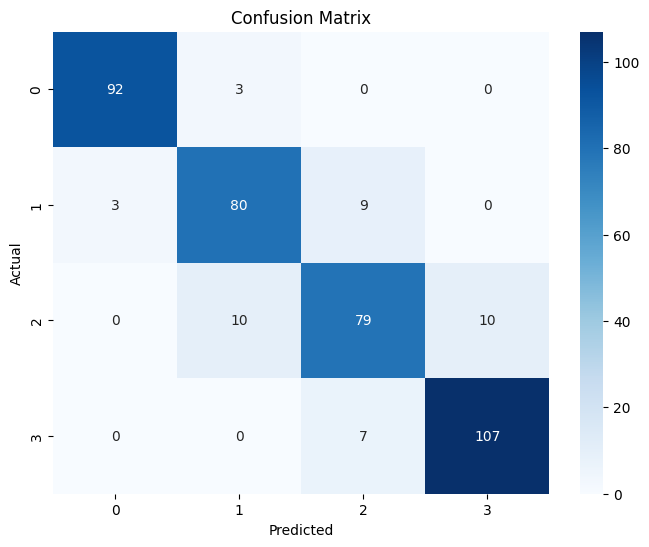

In [36]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
print("Accuracy Score = ",accuracy_score(y_test,y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## SVM Classifer

Cross-validation scores: [0.928125 0.93125  0.896875 0.909375 0.915625]
SVM Accuracy score =  0.9625


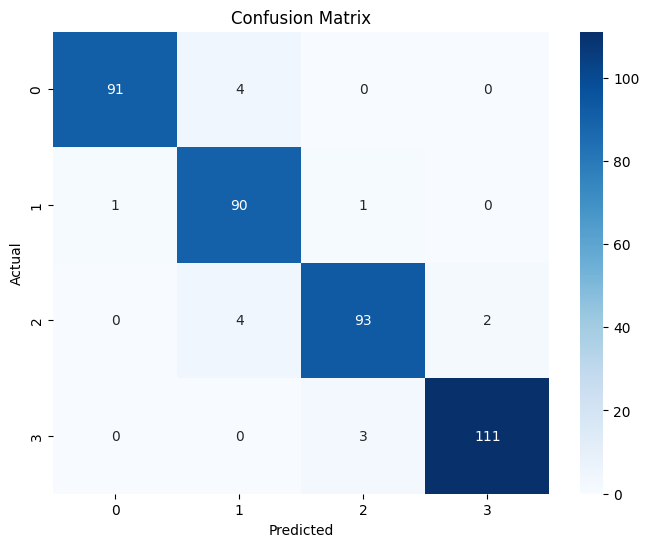

In [37]:
svm_clf = SVC(decision_function_shape='ovo')
svm_clf.fit(X_train_scaled, y_train)

cv_scores = cross_val_score(svm_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)

y_pred =clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred) 
print("SVM Accuracy score = ", accuracy_score(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()